# Exploring MODIS NDVI data
I have no idea what I'm doing right now.
https://ladsweb.modaps.eosdis.nasa.gov/missions-and-measurements/products/MYD13Q1/#product-information

## Import required libraries

In [1]:
import glob

In [3]:
import os

In [2]:
import rioxarray as rxr
import xarray as xr

In [14]:
import earthpy as ep

In [18]:
import earthpy.plot as epp

In [15]:
import matplotlib.pyplot as plt

## Open the TIF data

In [6]:
!pwd

/home/josh/Documents/DataSci/socal-greenspace


Get all the layers for the 137th day of 2022 (May 17):

In [9]:
modis_raw_list = glob.glob(os.path.join("modis",
                                        "MYD13Q1.061*2022137*.tif"))

In [10]:
modis_raw_list

['modis/MYD13Q1.061__250m_16_days_sun_zenith_angle_doy2022137_aid0001.tif',
 'modis/MYD13Q1.061__250m_16_days_view_zenith_angle_doy2022137_aid0001.tif',
 'modis/MYD13Q1.061__250m_16_days_MIR_reflectance_doy2022137_aid0001.tif',
 'modis/MYD13Q1.061__250m_16_days_NDVI_doy2022137_aid0001.tif',
 'modis/MYD13Q1.061__250m_16_days_pixel_reliability_doy2022137_aid0001.tif',
 'modis/MYD13Q1.061__250m_16_days_VI_Quality_doy2022137_aid0001.tif',
 'modis/MYD13Q1.061__250m_16_days_relative_azimuth_angle_doy2022137_aid0001.tif',
 'modis/MYD13Q1.061__250m_16_days_red_reflectance_doy2022137_aid0001.tif',
 'modis/MYD13Q1.061__250m_16_days_composite_day_of_the_year_doy2022137_aid0001.tif',
 'modis/MYD13Q1.061__250m_16_days_EVI_doy2022137_aid0001.tif',
 'modis/MYD13Q1.061__250m_16_days_NIR_reflectance_doy2022137_aid0001.tif',
 'modis/MYD13Q1.061__250m_16_days_blue_reflectance_doy2022137_aid0001.tif']

In [11]:
def combine_tifs(tif_list):
    """This function accepts a list of paths to tif files and combines them into an xarray.
    
    ===> Inputs:
        tif_list (list): A list of paths to the tif files.
         

    ===> Returns:
        An xarray containing the combined tif files.
    """
    
    xarr_out = []
    for i, tif_path in enumerate(tif_list):
        xarr_out.append(rxr.open_rasterio(tif_path, masked = True).squeeze())
        xarr_out[i]['band'] = i + 1
        
    return xr.concat(xarr_out, dim = 'band')

In [13]:
modis_raw = combine_tifs(modis_raw_list)
modis_raw.shape

(12, 547, 794)

## Plot the NDVI data

In [31]:
titles = [title.split("16_days_")[1].split("_doy")[0] for title in modis_raw_list]
titles

['sun_zenith_angle',
 'view_zenith_angle',
 'MIR_reflectance',
 'NDVI',
 'pixel_reliability',
 'VI_Quality',
 'relative_azimuth_angle',
 'red_reflectance',
 'composite_day_of_the_year',
 'EVI',
 'NIR_reflectance',
 'blue_reflectance']

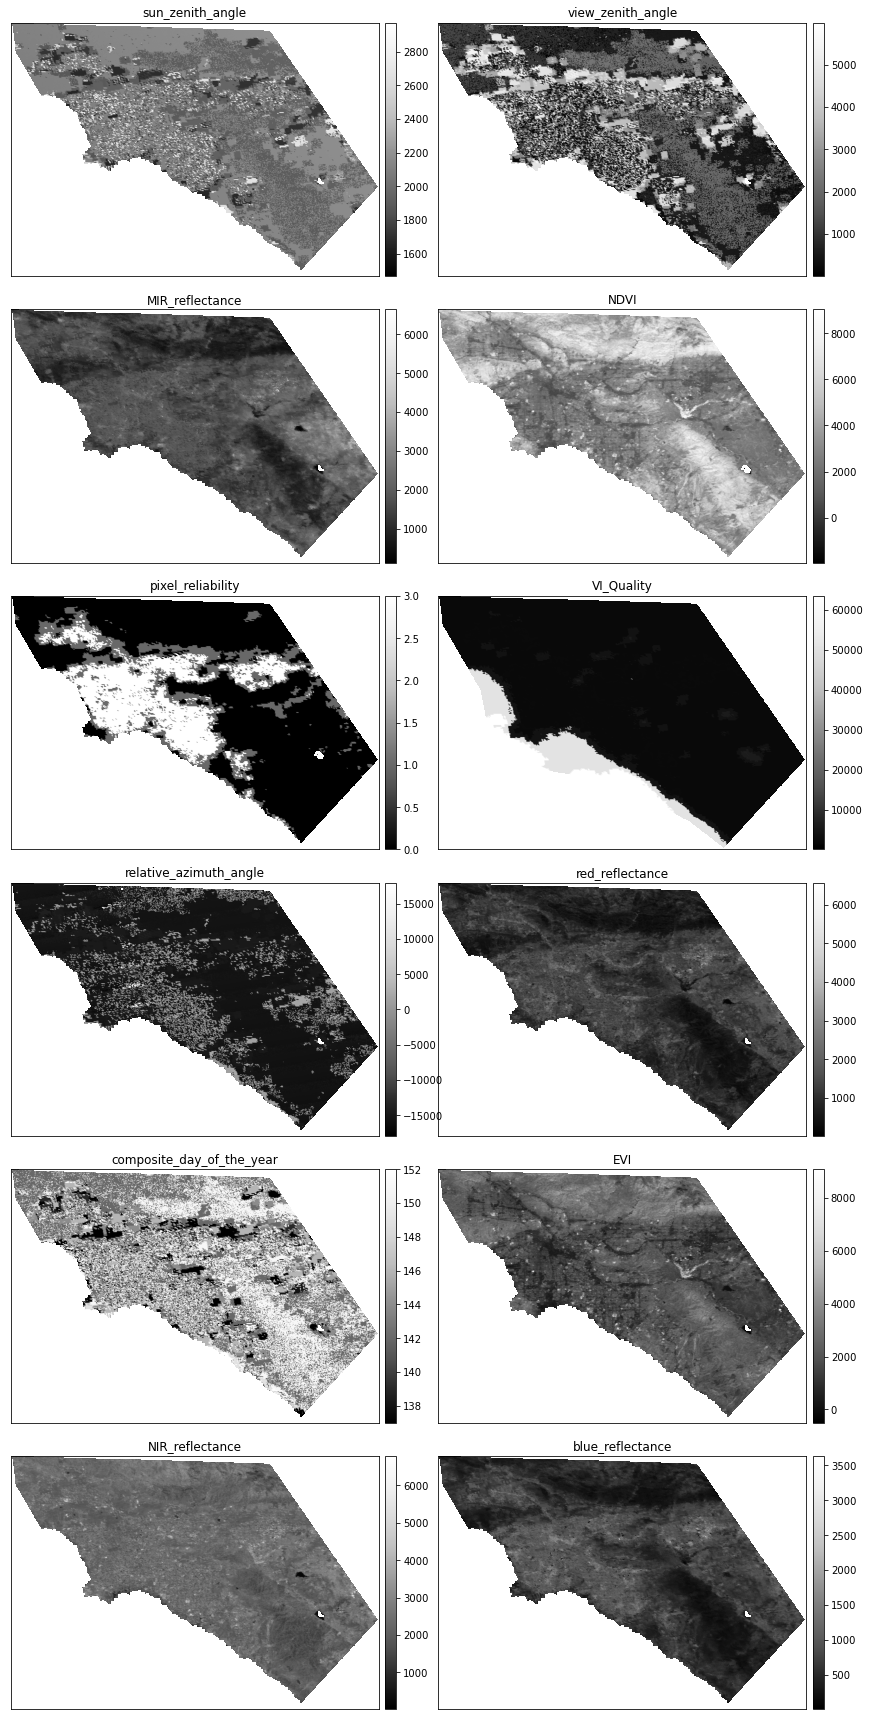

In [32]:
epp.plot_bands(modis_raw.values,
               figsize = (12, 24),
               cols = 2,
               title = titles)
plt.show()